In [1]:
from jupyter_utils import change_path_to_parent
change_path_to_parent()

In [2]:
import numpy as np
import numpy.linalg as la
from sklearn.datasets import load_svmlight_file

from loss_functions.logistic_regression import LogisticRegression
from first_order import Gd
from second_order import Newton

In [3]:
data_path = '../datasets/mushrooms'
n_epoch = 200
data = load_svmlight_file(data_path)
A, b = data[0].toarray(), data[1]
loss = LogisticRegression(A, b)
n, dim = A.shape
L = loss.smoothness()
l2 = L / (1 * n)
x0 = np.zeros(dim)

In [4]:
gd = Gd(loss=loss, it_max=n_epoch)
gd_trace = gd.run(x0=x0)

In [5]:
newt = Newton(loss=loss, it_max=60)
newt_trace = newt.run(x0=x0)
newt_trace.compute_loss_of_iterates()
f_opt = np.min(newt_trace.loss_vals)
x_opt = newt_trace.xs[-1]

In [6]:
from stochastic_first_order.sgd import Sgd
batch_size = 16
sgd = Sgd(loss=loss, it_max=n_epoch*n/batch_size, n_seeds=1, batch_size=batch_size)
sgd_trace = sgd.run(x0=x0)
sgd_trace.convert_its_to_epochs(batch_size=batch_size)

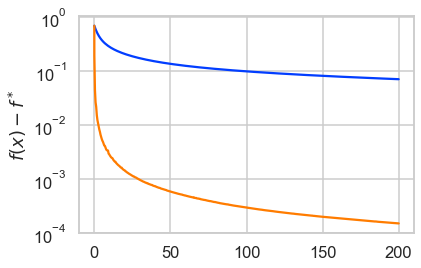

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
gd_trace.plot_losses(f_opt=f_opt)
sgd_trace.plot_losses(f_opt=f_opt)
plt.yscale('log')

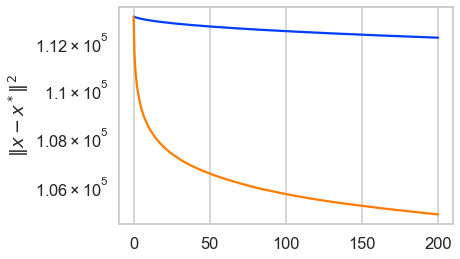

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
gd_trace.plot_distances(x_opt=x_opt)
sgd_trace.plot_distances(x_opt=x_opt)
plt.yscale('log')